# Predicting wine quality using machine learning techniques
### import data from uci ml website: wine quality, winequality-red.csv

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/home/julien/ML_wine_quality/wine_quality_data/clean-winequality-red.csv')
df.head(10)

,"fixed acidity""",volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [136]:
df = df.rename(columns={'fixed acidity"': 'fixed acidity', 'quality\n': 'quality'})

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [138]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


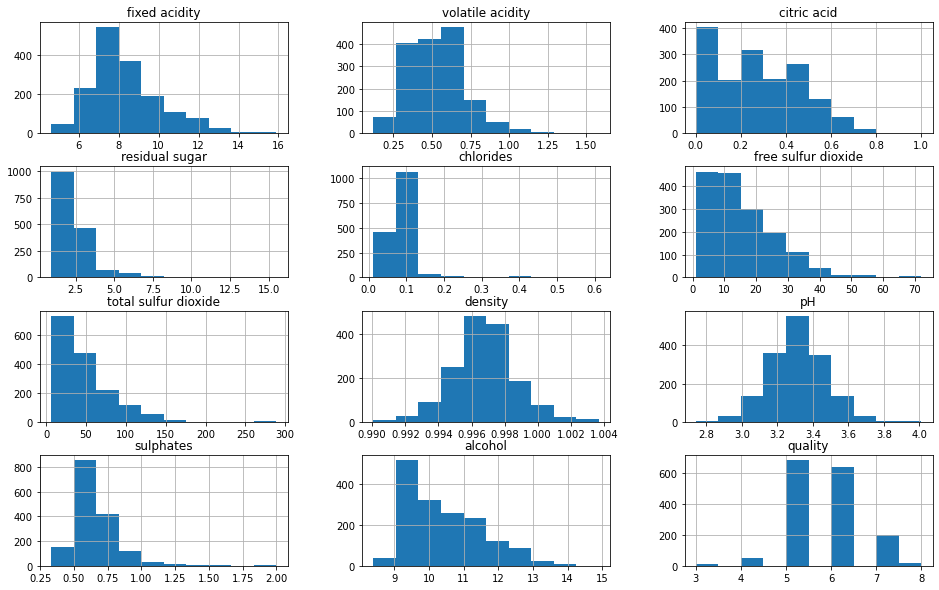

In [139]:
# Histograms 
df.hist(bins=10, figsize=(16, 10))
plt.show()

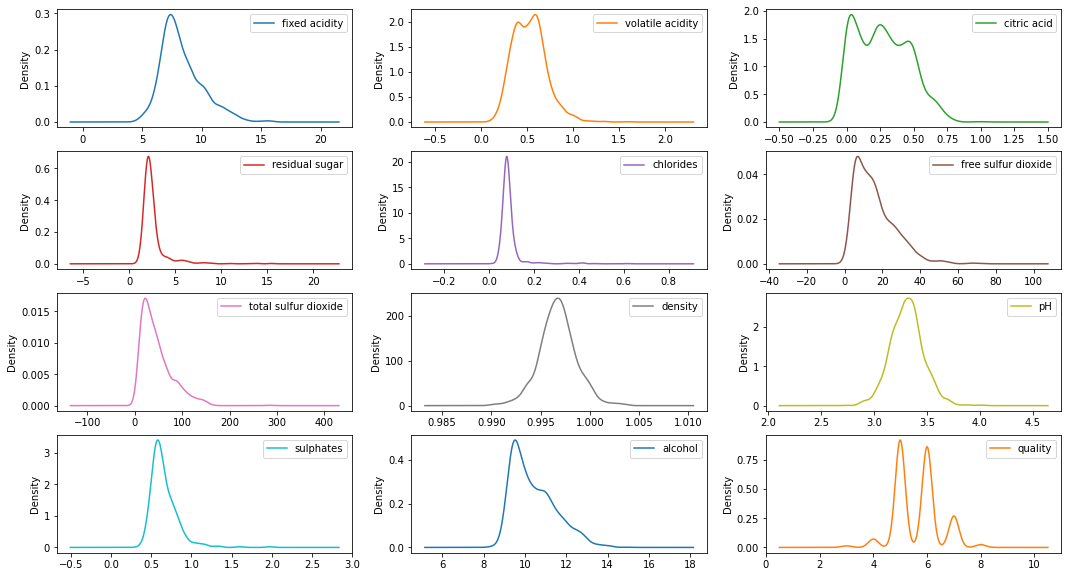

In [140]:
# Density
df.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(18, 10))
plt.show()

In [141]:
# create pivot table 
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
               'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df_pivot_table = df.pivot_table(column_names, ['quality'], aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          9.925     0.0905        0.035  0.997565           7.50   
4         10.000     0.0800        0.090  0.996500           7.50   
5          9.700     0.0810        0.230  0.997000           7.80   
6         10.500     0.0780        0.260  0.996560           7.90   
7         11.500     0.0730        0.400  0.995770           8.80   
8         12.150     0.0705        0.420  0.994940           8.25   

         free sulfur dioxide    pH  residual sugar  sulphates  \
quality                                                         
3                        6.0  3.39             2.1      0.545   
4                       11.0  3.37             2.1      0.560   
5                       15.0  3.30             2.2      0.580   
6                       14.0  3.32             2.2      0.640   
7                       11.0  3.28             2.3      0

In [142]:
corr_matrix = df.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


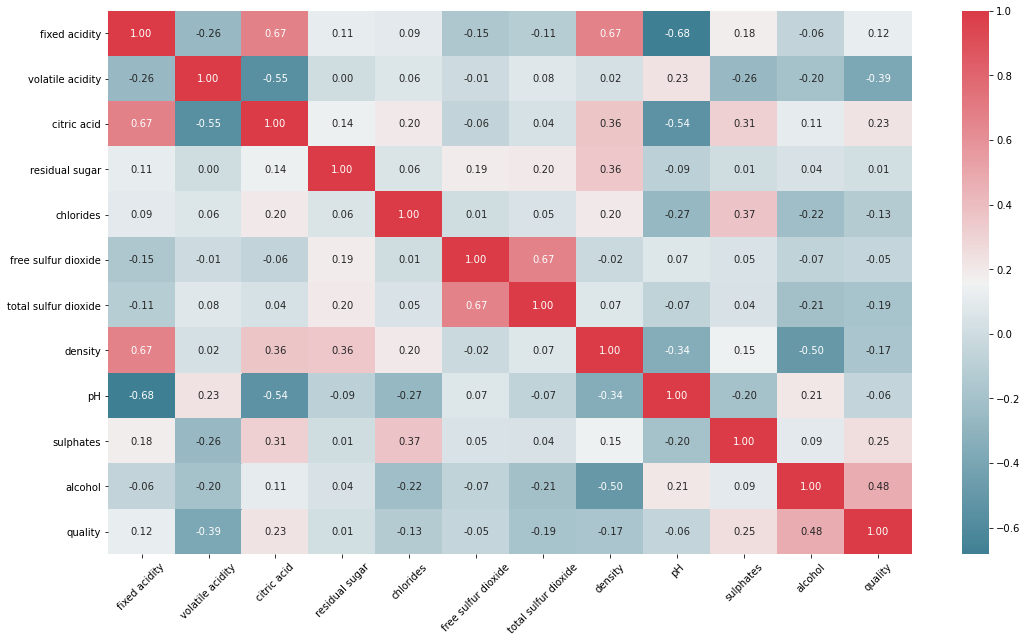

In [143]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
               'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Correlation matrix
correlations = df.corr()
# plot figsize
fig, ax = plt.subplots(figsize=(18, 10))
# Generate color map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(column_names, rotation=45);
ax.set_yticklabels(column_names);

0    1382
1     217
Name: quality, dtype: int64


/home/julien/miniconda3/envs/supenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


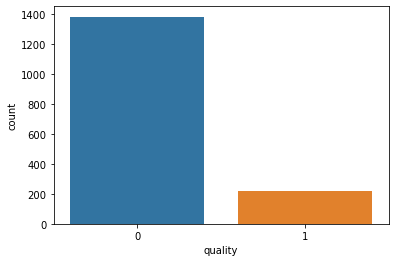

In [144]:
# dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)

# assign a labels to your quality variable
label_quality = LabelEncoder()
# bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])
print(df['quality'].value_counts())

sns.countplot(df['quality'])
plt.show()

In [145]:
# Data spliting. The data has been split in two groups
X = df.drop('quality', axis=1)
y = df['quality']
# Train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
# Applying standard scaling standardScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [146]:
print(X_train)

[[ 0.95891964 -0.64729253  0.91841253 ... -0.66144466 -1.00107571
   1.22683979]
 [ 1.18715099 -0.53480404  1.17686129 ... -1.36563421  1.23858005
   0.85903588]
 [-0.0110636   0.4213481  -0.73565955 ... -0.02127234 -0.41169262
  -1.1638856 ]
 ...
 [-0.75281549 -0.92851375 -0.32214153 ...  0.55488275 -0.70638416
  -0.33632681]
 [-0.12517927  1.46186661  1.28024079 ... -0.66144466  0.17769048
  -1.07193462]
 [-0.4675263  -0.81602526  1.53868955 ...  0.29881382 -0.64744585
   0.85903588]]


In [147]:
print(X_test)

[[ 1.22930243 -1.13856521  1.82497875 ... -0.28901528  0.52639898
   0.99525257]
 [-1.25368895  0.22498594 -1.330117   ...  1.76164747  1.1201518
  -0.89442597]
 [ 0.40163864 -0.75677089  0.72319928 ... -0.56243698 -0.30485496
   2.04507398]
 ...
 [-0.83985705  1.64307913 -0.27841842 ...  1.5565812   0.40764842
  -1.05189918]
 [-1.01721358  0.85221947 -1.330117   ...  1.2831595   0.11077201
  -1.10439026]
 [-0.78073821  0.60678026 -1.22995523 ...  1.14644865  0.11077201
  -0.78944383]]


In [148]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('supportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))

# Evalute each model in turn
from time import time

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start =time()
    kf = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    score_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = ("{:<15}| accuracy = {:.3f} | std = {:.3f} | time = {:,.3f}s".format(name, cv_results.mean(), cv_results.std(), score_time))
    print(msg)

supportVectorClassifier| accuracy = 0.874 | std = 0.033 | time = 0.280s
StochasticGradientDecentC| accuracy = 0.840 | std = 0.028 | time = 0.058s
RandomForestClassifier| accuracy = 0.890 | std = 0.031 | time = 2.397s
DecisionTreeClassifier| accuracy = 0.846 | std = 0.037 | time = 0.063s
GaussianNB     | accuracy = 0.819 | std = 0.020 | time = 0.019s
KNeighborsClassifier| accuracy = 0.860 | std = 0.029 | time = 0.091s
AdaBoostClassifier| accuracy = 0.860 | std = 0.029 | time = 1.153s


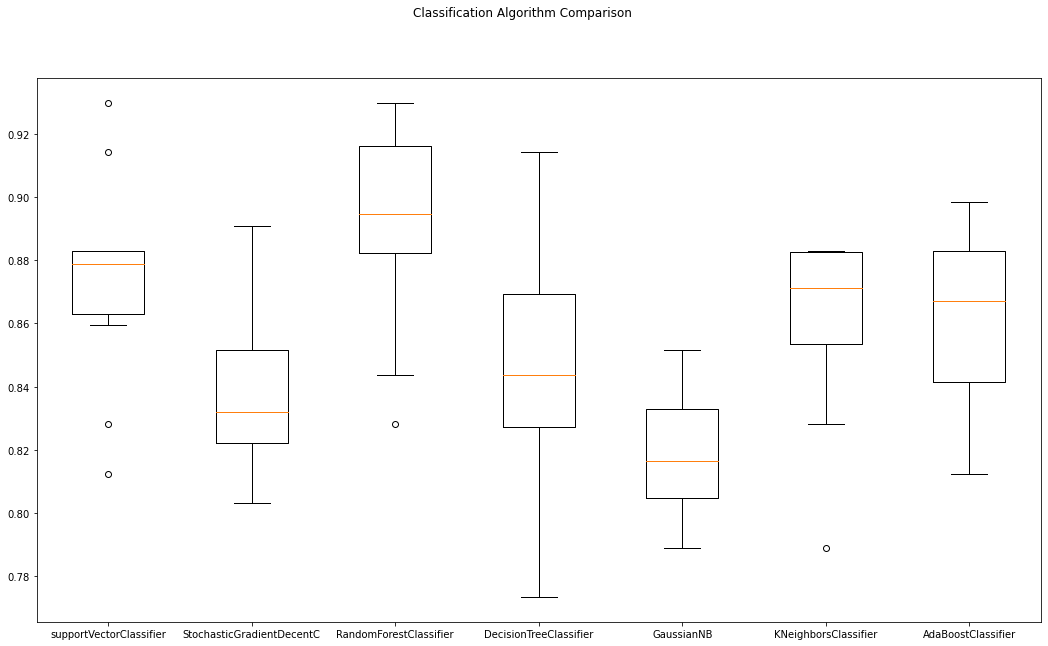

In [149]:
# box plot algorithm comparison
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [150]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       287
           1       0.82      0.55      0.65        33

    accuracy                           0.94       320
   macro avg       0.88      0.77      0.81       320
weighted avg       0.94      0.94      0.94       320



<AxesSubplot:>

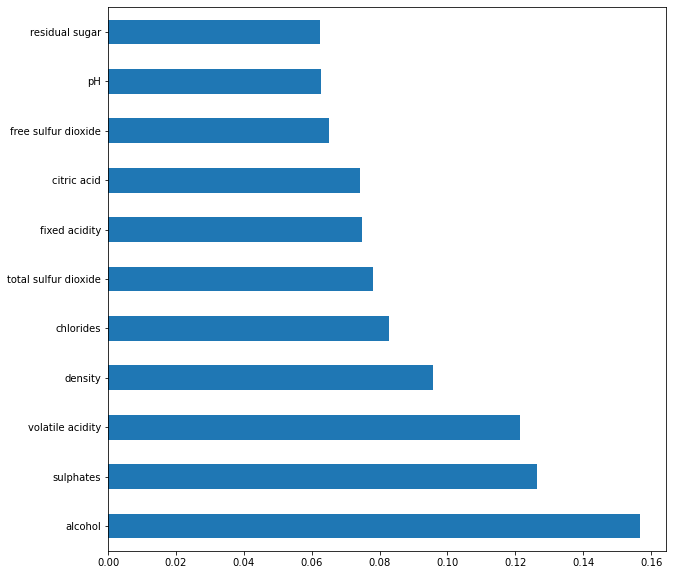

In [151]:
feat_importances = pd.Series(rf.feature_importances_, index=column_names[0:11])
feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 10))

In [152]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)
y_pred2 = ab.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       287
           1       0.48      0.42      0.45        33

    accuracy                           0.89       320
   macro avg       0.71      0.69      0.70       320
weighted avg       0.89      0.89      0.89       320



<AxesSubplot:>

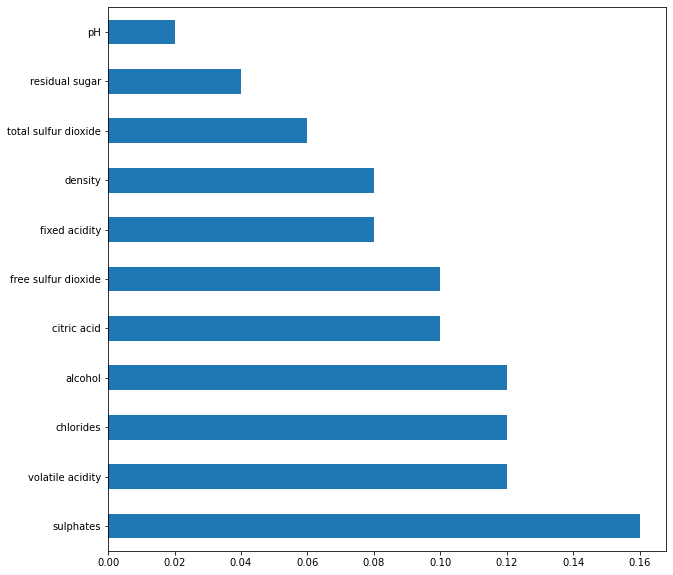

In [153]:
feat_importances = pd.Series(ab.feature_importances_, index=column_names[0:11])
feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 10))

In [154]:
dt  = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred3 = dt.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       287
           1       0.50      0.61      0.55        33

    accuracy                           0.90       320
   macro avg       0.73      0.77      0.74       320
weighted avg       0.91      0.90      0.90       320



<AxesSubplot:>

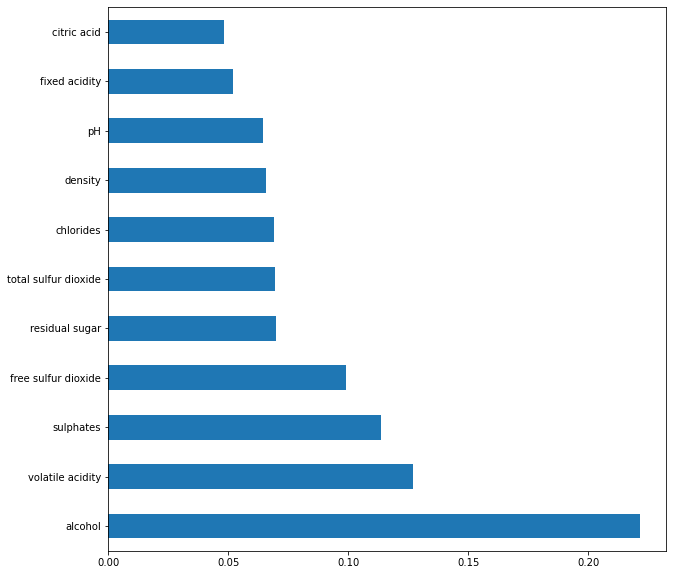

In [155]:
feat_importances = pd.Series(dt.feature_importances_, index=column_names[0:11])
feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 10))

In [156]:
# Filtering df for only good quality
df_temp = df[df["quality"]== 1]
df_temp.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [157]:
# Filtering df for only bad quality
df_temp1 = df[df["quality"]== 0]
df_temp1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0
